In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
#Create the dataframe from de CSV file
df=pd.read_csv('clean.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Lobulation_mean', 'Spiculation_Max', 'Margin_min',
       'Calcification', 'Malignancy'],
      dtype='object')

In [4]:
# Identify the features used to predict the classification of the malignancy of the node
# X - vector of valiables used to predict
# y - target variable

X=df[['Spiculation_Max', 'Calcification', 'Margin_min','Lobulation_mean']]
y=df['Malignancy']

In [5]:
# Devide the dataset in train (80%) and test (20%) subsets
# Define a random state do fix this division

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [6]:
# Construction of a decision tree classifier with the stop criterion of 
# at least 0.001 of minimum impurity decrease to avoind overfitting

dt = tree.DecisionTreeClassifier(min_impurity_decrease=0.001)
dt = dt.fit(X_train, y_train)
df['Prediction_dt']=dt.predict(X)

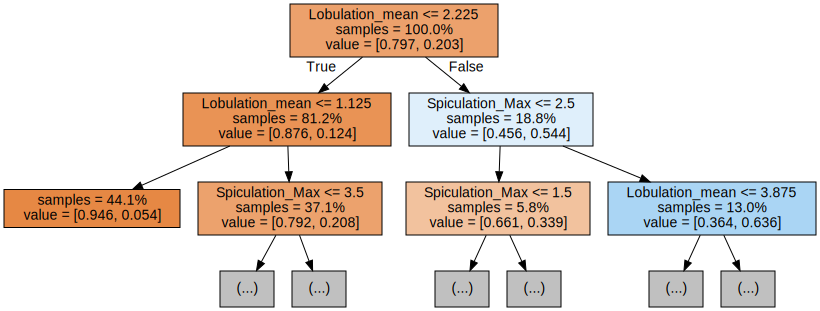

In [7]:
# print of the more significant separations with percentage of the subset (train) and proportion for each separation

dt_data = export_graphviz(dt,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
graph = graphviz.Source(dt_data)
display(graph)

In [8]:
# test of the decision tree obtained using the test subset
y_predict=dt.predict(X_test)

print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

Confusion Matrix:


array([[387,  21],
       [ 71,  52]])

In [9]:
print("Accuracy:")
accuracy_score(y_test, y_predict)

Accuracy:


0.8267419962335216

In [10]:
# Random Forest construction with trees similar to the ones obtained previously
# for different values of hyperparameter - number of features (max_features) 

rf = RandomForestClassifier(max_features=1,min_impurity_decrease=0.001)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Number of featrures: ", 1 ," Accuracy: ", accuracy)
best=1
best_ac=accuracy
x_rf=[1]
y_rf=[accuracy]
    
for i in range(2,10):
    rf = RandomForestClassifier(max_features=i,min_impurity_decrease=0.001,n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Number of featrures: ", i ," Accuracy: ", accuracy)
    x_rf.append(i)
    y_rf.append(accuracy)
    if(accuracy>best_ac):
        best=i
        best_ac=accuracy

#print("Number of featrures: ", best ," Accuracy: ", best_ac)

Best number of features:  6  with accuracy= 0.8361581920903954


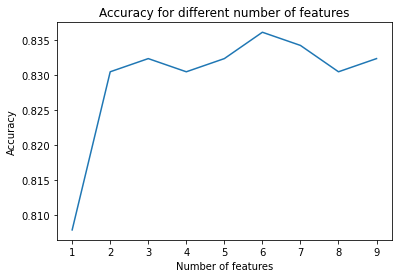

In [11]:
# Evaluate the hyperparameter and identify the best value for the accuracy

s = pd.Series(y_rf,x_rf)
plt.title('Accuracy for different number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')

s.plot.line()  
print("Best number of features: ", best ," with accuracy=", best_ac)

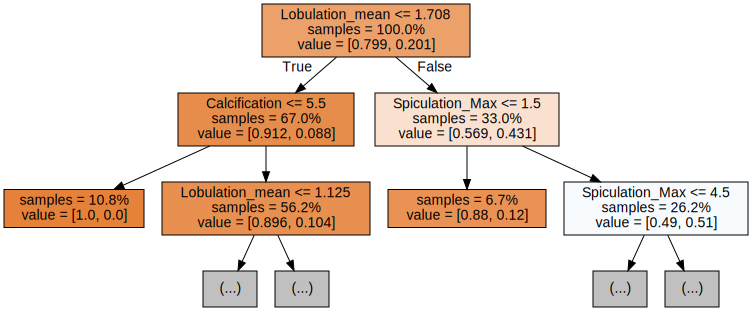

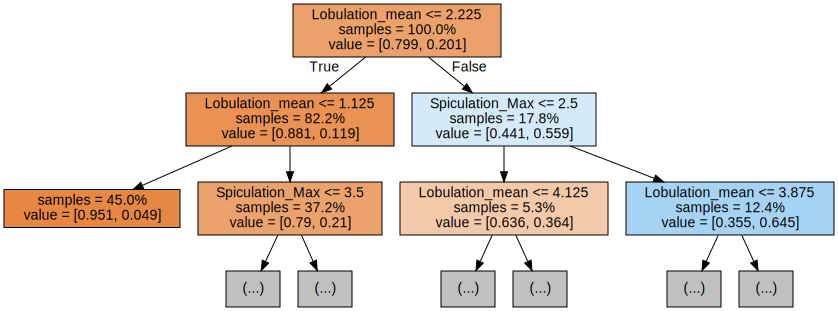

In [12]:
# print of the more significant separations with percentage of the subset (train) and proportion for each separation
# for the two first trees

rf = RandomForestClassifier(max_features=best,min_impurity_decrease=0.001)
rf.fit(X_train, y_train)
df['Prediction_rf']=rf.predict(X)

for i in range(2):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [13]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.832391713747646


In [14]:
#KNN

In [15]:
# Knn construction for different values of hyperparameter - number of neighbors (n_neighbors) 


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Number of neighbors: ","1", "Accuracy: ", accuracy)
best=1
best_ac=accuracy
x_knn=[1]
y_knn=[accuracy]

for i in range(2,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Number of neighbors: ",i, "Accuracy: ", accuracy)
    x_knn.append(i)
    y_knn.append(accuracy)
    if(accuracy>best_ac):
        best=i
        best_ac=accuracy

Best number of neighbors:  18  with accuracy= 0.8436911487758946


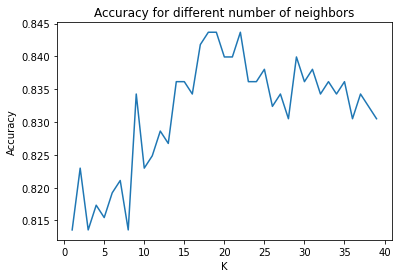

In [16]:
# Evaluate the hyperparameter and identify the best value for the accuracy

s = pd.Series(y_knn,x_knn)
plt.title('Accuracy for different number of neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy')

s.plot.line()  
print("Best number of neighbors: ", best ," with accuracy=", best_ac)

In [18]:
# The results are verry similar to those obtained with the all set of features
# The accuracy for the models with the clean feature set are better for de decision tree and the Knn 
# and worst for the random forest   